In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

plt.style.use('fivethirtyeight')

import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
names = [
    'message_sent_date',
    'time_sent_local',
    'buyer_sk',
    'item_id',
    'msg_num_in_conv',
    'reply_channel_sk',
    'msg_type',
    'message_text'
]
chats = pd.read_csv("s3://olx-relevance-panamera-west/olx-mas-data/web/chats/000.gz", 
                    names=names, 
                    dtype=str, index_col=False)

In [3]:
chats.head()

,message_sent_date,time_sent_local,buyer_sk,item_id,msg_num_in_conv,reply_channel_sk,msg_type,message_text
0,2019-04-28,2019-04-28 11:55:20.722,103130615,1005001135,11,mobile_app|android,buyer-seller,Apne respond tu kia nae bhai anywsys thsnx nd ok
1,2019-05-06,2019-05-06 07:23:23.126,4299540,1005339032,1,mobile_app|android,buyer-seller,5 lkh
2,2019-05-14,2019-05-14 09:38:36.408,31257744,1005851343,2,NaN,seller-buyer,final 3.70
3,2019-05-23,2019-05-23 11:21:33.137,38125126,1005987889,2,mobile_app|android,buyer-seller,Hi
4,2019-06-02,2019-06-02 15:58:56.498,33434270,1006327937,1,mobile_app|android,buyer-seller,"Dear Usman\, i am also in urgent need of car...."


In [4]:
names= [
    'date_sent_nk',
    'buyer_sk',
    'listing_id',
    'action_sk',
    'reply_channel_sk',
    'action_count'
]

contacts = pd.read_csv("s3://olx-relevance-panamera-west/olx-mas-data/web/contacts/000.gz", 
                       names=names
                       )

In [5]:
contacts.head()

,date_sent_nk,buyer_sk,listing_id,action_sk,reply_channel_sk,action_count
0,2019-01-01,38537341,1001869755,reply|chat,mobile_app|android,3
1,2019-01-03,26914697,1001919184,reply|sms,mobile_app|android,1
2,2019-01-04,34309956,1001932935,reply|chat,mobile_app|android,1
3,2019-01-04,101490552,1001982254,reply|call,mobile_app|android,1
4,2019-01-05,38680547,1001947906,reply|call,mobile_app|android,2


In [4]:
names = [
    'listing_id',
    'status',
    'district_id',
    'city_id',
    'seller_id',
    'created_at_first',
    'created_at',
    'valid_to',
    'trackevent',
    'title',
    'description',
    'price',
    'brand',
    'model',
    'fuel_type',
    'mileage',
    'installments',
    'new_or_used',
    'year',
    'registration_city',
    'time_sold_local',
    'ad_update_count'
]

ads_data = pd.read_csv("s3://olx-relevance-panamera-west/olx-mas-data/web/user_ads/000.gz",
                       names=names, dtype=str, escapechar='\\', index_col=False)

In [5]:
ads_data.head()

,listing_id,status,district_id,city_id,seller_id,created_at_first,created_at,valid_to,trackevent,title,description,price,brand,model,fuel_type,mileage,installments,new_or_used,year,registration_city,time_sold_local,ad_update_count
0,1001879044,removed_by_user,5000145,4060695,101422439,2019-01-01 14:36:20,2019-05-01 10:29:54,2019-01-31 14:36:20,ad_remove_complete,Toyota premio 2014 model for sell,Toyota Premio red wine family used car with fu...,3200000,toyota,toyota-57,petrol,95000,cash,used,2014,karachi,NaN,2
1,1001903073,sold,5001000,4060615,103680578,2019-01-02 11:25:23,2019-07-16 14:08:07,2019-02-01 11:25:23,ad_mark_sold_confirm,daewoo racer family car,daewoo racer on my name red passport book comp...,210000,daewoo,daewoo-3,cng,9999,cash,used,1993,lahore,2019-07-16 14:08:07,2
2,1001915462,removed_by_user,1,4060660,103915700,2019-01-02 17:08:15,2019-07-16 09:38:44,2019-02-01 17:08:15,ad_remove_complete,Suzuki Bolan for sale,Bumper to Bumper 100% Genuine\nNa kahin zang n...,750000,NaN,NaN,NaN,54571,NaN,used,2014,NaN,NaN,3
3,1001932935,sold,5000181,4060695,23520885,2019-01-03 10:26:03,2019-06-30 07:55:03,2019-02-02 10:26:03,ad_mark_sold_confirm,Alto taxi 660,Jesi hai jahan hai ki bonyad par urgent sell \...,70000,suzuki,cars-suzuki-1,cng,1,cash,used,1993,karachi,2019-06-30 07:55:03,2
4,1002157412,removed_by_user,1,4060675,29031033,2019-01-10 14:19:00,2019-05-21 10:22:03,2019-02-09 14:19:00,ad_remove_complete,Suzuki Baleno JXR 2005,"Suzuki Baleno 2005\nNeat & Clean Interior, Ext...",500000,suzuki,cars-suzuki-4,petrol,150000,cash,used,2005,lahore,NaN,3


In [55]:
ads_data.shape

(26186, 22)

In [56]:
ads_data.drop_duplicates(inplace=True)

In [57]:
ads_data.shape

(26157, 22)

In [58]:
ads_data['created_at_first'] = pd.to_datetime(ads_data['created_at_first'])
ads_data['created_at'] = pd.to_datetime(ads_data['created_at'])
ads_data['valid_to'] = pd.to_datetime(ads_data['valid_to'])
ads_data['listing_id'] = ads_data['listing_id'].astype(int)

In [59]:
# keep only ads valid until 19th July
ads_data = ads_data[ads_data['valid_to'].le('2019-07-18 23:59:59')]

In [135]:
.12/.36

0.3333333333333333

In [134]:
ads_data.groupby('brand').transform('len')

AttributeError: 'DataFrameGroupBy' object has no attribute 'len'

In [60]:
ads_data.shape

(19637, 22)

In [61]:
# remove outliers
ads_data['year'] = pd.to_numeric(ads_data['year'], errors='coerce')
ads_data['price'] = pd.to_numeric(ads_data['price'], errors='coerce', downcast='integer')

percentile_99 = ads_data['price'].quantile(0.99)
ads_data = ads_data[ads_data['price'].lt(percentile_99)]
ads_data = ads_data[ads_data['year'].ge(1960)]

In [62]:
# set fake_mileage if the mileage has less than 3 letters
ads_data['fake_mileage'] = ads_data['mileage'].str.len().lt(3).astype(int)

In [63]:
ads_data['std_price_district'] = ads_data.groupby(['district_id','brand','model'])['price'].transform('std')

In [64]:
names = [
    'created_at_first',
    'time_sold_local',
    'message_sent_date',
    'buyer_sk',
    'item_id',
    'reply_channel_sk',
    'msg_type',
    'msg_count'
]

chat_count = pd.read_csv("s3://olx-relevance-panamera-west/olx-mas-data/web/chat_count/000.gz", 
                       names = names
                       )

In [65]:
chat_count.head()

,created_at_first,time_sold_local,message_sent_date,buyer_sk,item_id,reply_channel_sk,msg_type,msg_count
0,2019-06-27 21:56:14,NaN,2019-06-28,30537709,1006943436,NaN,seller-buyer,10
1,2019-06-16 19:18:26,2019-06-22 10:29:16,2019-06-16,36735168,1006632543,mobile_app|android,buyer-seller,1
2,2019-06-01 18:40:24,2019-06-18 20:19:05,2019-06-12,20147499,1006318087,NaN,seller-buyer,4
3,2019-06-29 23:56:53,NaN,2019-07-02,28320087,1006998271,mobile_app|android,buyer-seller,13
4,2019-05-06 14:18:05,2019-05-19 13:28:11,2019-05-18,103202744,1005663188,web|desktop_web,buyer-seller,1


In [66]:
replies = (pd
 .pivot_table(index=['item_id','buyer_sk'], 
              columns=['msg_type'], 
              values='msg_count', 
              data=chat_count, 
              aggfunc='sum',
              fill_value=0)
           .reset_index())
replies.columns.name = None

In [67]:
replies.head()

,item_id,buyer_sk,buyer-seller,seller-buyer
0,1001869755,26368991,1,0
1,1001869755,32711508,9,5
2,1001869755,32754025,2,1
3,1001869755,33350108,1,0
4,1001869755,34560842,1,0


In [68]:
# only keep seller messages
replies = (replies
           .groupby('item_id')
           .aggregate({'buyer_sk': 'nunique', 'seller-buyer': sum})
           .reset_index())
replies.columns = ['listing_id','unique_buyer_chat_sent_count','seller_msgs']

In [69]:
ads_data = ads_data.merge(replies, how='left', on='listing_id')

In [70]:
# cumulative unique ads posted by seller until each date
ads_data['seller_ad_count'] = ads_data.groupby('seller_id')['listing_id'].cumcount()

In [71]:
# add features from contacts
contacts['action_sk'] = contacts['action_sk'].str.split('|').str[1]

In [72]:
real_contacts = pd.pivot_table(index=['listing_id','buyer_sk'], 
               columns='action_sk', 
               data=contacts, 
               values='action_count', 
               aggfunc='mean', 
               fill_value=0)
real_contacts.columns.name = None
real_contacts = real_contacts.reset_index()

In [73]:
real_contacts.head()

,listing_id,buyer_sk,call,chat,sms
0,1001868990,101406621,2.0,0.0,0.0
1,1001869755,100055301,0.0,0.0,1.0
2,1001869755,100060202,0.0,1.0,0.0
3,1001869755,100232646,1.0,0.0,0.0
4,1001869755,100266118,0.0,2.0,0.0


In [74]:
# call-sms 0.86 correlation
real_contacts = (real_contacts
           .groupby('listing_id')
           .aggregate({'call': sum, 'sms': sum})
           .reset_index())
real_contacts.columns = ['listing_id','call_count','sms_count']
# real_contacts = real_contacts.drop('chat_count', axis=1) # because this is a same feature in replies data frame

In [75]:
real_contacts.head()

,listing_id,call_count,sms_count
0,1001868990,2.0,0.0
1,1001869755,29.5,5.0
2,1001870957,5.0,2.0
3,1001873455,6.0,0.0
4,1001873889,3.0,2.0


In [29]:
contacts['reply_channel_sk'] = contacts['reply_channel_sk'].str.split('|').str[1]

In [30]:
platform_contacts = pd.pivot_table(index=['listing_id'], 
               columns=['action_sk','reply_channel_sk'], 
               data=contacts, 
               values='action_count', 
               aggfunc='sum', 
               fill_value=0)
#platform_contacts.columns.name = None
#platform_contacts = real_contacts.reset_index()

platform_contacts.columns = ['_'.join(col).strip() for col in platform_contacts.columns.values]
platform_contacts = platform_contacts.reset_index()

In [76]:
ads_data = (ads_data
            .merge(real_contacts, how='left',on='listing_id')
           )

In [32]:
ads_data = (ads_data
            .merge(platform_contacts, how='left',on='listing_id')
           )

In [33]:
cols = ['unique_buyer_chat_sent_count','seller_msgs','call_count','sms_count']
ads_data[cols] = ads_data[cols].fillna(0).astype(int)

In [37]:
ads_data[['unique_buyer_chat_sent_count',
          'seller_msgs','seller_ad_count',
         'call_count']].corr()

,unique_buyer_chat_sent_count,seller_msgs,seller_ad_count,call_count
unique_buyer_chat_sent_count,1.000000,0.438623,-0.108636,0.713838
seller_msgs,0.438623,1.000000,-0.071745,0.181045
seller_ad_count,-0.108636,-0.071745,1.000000,-0.082596
call_count,0.713838,0.181045,-0.082596,1.000000


In [45]:
drop_correlated_cols = ['call_android','chat_android','call_count','sms_android','sms_count']
ads_data = ads_data.drop(drop_correlated_cols, axis=1)

KeyError: "['call_android' 'chat_android' 'call_count' 'sms_android'] not found in axis"

In [77]:
ads_data.head()

,listing_id,status,district_id,city_id,seller_id,created_at_first,created_at,valid_to,trackevent,title,description,price,brand,model,fuel_type,mileage,installments,new_or_used,year,registration_city,time_sold_local,ad_update_count,fake_mileage,std_price_district,unique_buyer_chat_sent_count,seller_msgs,seller_ad_count,call_count,sms_count
0,1001879044,removed_by_user,5000145,4060695,101422439,2019-01-01 14:36:20,2019-05-01 10:29:54,2019-01-31 14:36:20,ad_remove_complete,Toyota premio 2014 model for sell,Toyota Premio red wine family used car with fu...,3200000,toyota,toyota-57,petrol,95000,cash,used,2014.0,karachi,NaN,2,0,NaN,2.0,6.0,0,7.000000,1.0
1,1001903073,sold,5001000,4060615,103680578,2019-01-02 11:25:23,2019-07-16 14:08:07,2019-02-01 11:25:23,ad_mark_sold_confirm,daewoo racer family car,daewoo racer on my name red passport book comp...,210000,daewoo,daewoo-3,cng,9999,cash,used,1993.0,lahore,2019-07-16 14:08:07,2,0,33166.247904,11.0,4.0,0,6.000000,14.0
2,1001915462,removed_by_user,1,4060660,103915700,2019-01-02 17:08:15,2019-07-16 09:38:44,2019-02-01 17:08:15,ad_remove_complete,Suzuki Bolan for sale,Bumper to Bumper 100% Genuine\nNa kahin zang n...,750000,NaN,NaN,NaN,54571,NaN,used,2014.0,NaN,NaN,3,0,NaN,NaN,NaN,0,1.000000,0.0
3,1001932935,sold,5000181,4060695,23520885,2019-01-03 10:26:03,2019-06-30 07:55:03,2019-02-02 10:26:03,ad_mark_sold_confirm,Alto taxi 660,Jesi hai jahan hai ki bonyad par urgent sell \...,70000,suzuki,cars-suzuki-1,cng,1,cash,used,1993.0,karachi,2019-06-30 07:55:03,2,1,314662.517628,224.0,164.0,0,219.333333,69.9
4,1002157412,removed_by_user,1,4060675,29031033,2019-01-10 14:19:00,2019-05-21 10:22:03,2019-02-09 14:19:00,ad_remove_complete,Suzuki Baleno JXR 2005,"Suzuki Baleno 2005\nNeat & Clean Interior, Ext...",500000,suzuki,cars-suzuki-4,petrol,150000,cash,used,2005.0,lahore,NaN,3,0,117063.628203,36.0,107.0,0,32.000000,17.0


In [78]:
old_data = ads_data[ads_data.created_at_first < '2019-05-07']
patch_data = ads_data[ads_data.created_at_first >= '2019-05-07']

print("number of ads created before '2019-05-07': {}\nnumber of ads created after '2019-05-07': {}"
      .format(old_data.shape[0], patch_data.shape[0]))

number of ads created before '2019-05-07': 7116
number of ads created after '2019-05-07': 12269


In [79]:
from sklearn.model_selection import train_test_split

# split data into train and test (not using old ads at this point)
train, test = train_test_split(patch_data, test_size=0.2, shuffle=True, random_state=42)
train_size = train.shape[0] 
test_size = test.shape[0]
total_size = train_size + test_size
print("train size: {} ({:.2f}%), test size: {} ({:.2f}%)"
      .format(train_size, train_size/float(train_size + test_size) * 100.0,
              test_size, test_size/float(train_size + test_size) * 100.0))

train size: 9815 (80.00%), test size: 2454 (20.00%)


In [80]:
# add old ads for training
train = pd.concat([train, old_data], axis=0) # to avoid appending the data multiple times!

# shuffle data
train = train.sample(frac=1.0, random_state=42)

In [81]:
# fix description null values
train['description'] = train['description'].fillna("")
test['description'] = test['description'].fillna("")

/home/ec2-user/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
ads_data.columns

Index(['listing_id', 'status', 'district_id', 'city_id', 'seller_id',
       'created_at_first', 'created_at', 'valid_to', 'trackevent', 'title',
       'description', 'price', 'brand', 'model', 'fuel_type', 'mileage',
       'installments', 'new_or_used', 'year', 'registration_city',
       'time_sold_local', 'ad_update_count', 'fake_mileage',
       'std_price_district', 'unique_buyer_chat_sent_count', 'seller_msgs',
       'seller_ad_count', 'call_count', 'sms_count'],
      dtype='object')

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD

def generate_pipeline(**kwargs):
    numeric_features = ['price', 'mileage', 'year', 'ad_update_count', 'fake_mileage', 'unique_buyer_chat_sent_count',
                        'seller_msgs', 'seller_ad_count','std_price_district','call_count'] 

    # categorical_features = ['registration_city', 'brand', 'model', 'petrol', 'installments', 'new_or_used']
    # categorical_transformer = Pipeline([
    #     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    #     ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    

    features = ColumnTransformer(
        [('numeric', 'passthrough', numeric_features),
    #      ('categorical', categorical_transformer, categorical_features),
         ('title_bow', CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=7, max_df=0.9), 'title'),
         ('descr_bow_svd', Pipeline([("desc_bow", TfidfVectorizer(stop_words=None, ngram_range=(1,1), min_df=7, max_df=1.0)),
                                     ('svd', TruncatedSVD(n_components=50, n_iter=20))]),
          'description'),
         
        ],  
        remainder='drop',
        sparse_threshold=0.3,
        n_jobs=None,
        transformer_weights=None
    #     verbose=False,
    )
    
    params = {k.split('__')[-1]:v for k,v in kwargs.items()}
    clf = XGBClassifier(n_estimators=500, **params)
    params_xgb = {
        'clf__learning_rate': np.logspace(-3, -1, 100),
        'clf__max_depth': (5,10,20,40,80),
        ##'clf__reg_alpha': (10,20,30,50),
        ##'clf__reg_lambda': (10,20,30,50),
        'clf__subsample': (.7,.8,.9), 
        'clf__colsample_bytree': (.7,.8,.9)
    }

    model = Pipeline([
        ('features', features),
        ('clf', clf)
    ]) 
    return model

In [126]:
model = generate_pipeline()

search = RandomizedSearchCV(estimator=model, param_distributions=params_xgb, scoring='precision',
                            cv=3, verbose=3, n_iter=50, n_jobs=-1, random_state=42)

In [86]:
%time search.fit(train, train.status == 'sold')

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 35.3min finished


CPU times: user 5min 55s, sys: 486 ms, total: 5min 55s
Wall time: 41min 2s


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('features',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               'passthrough',
                                                                               ['price',
                                                                                'mileage',
                                                                                'year',
                                              

In [87]:
search.best_score_, search.best_params_

(0.673352482515424,
 {'clf__subsample': 0.8,
  'clf__max_depth': 40,
  'clf__learning_rate': 0.049770235643321115,
  'clf__colsample_bytree': 0.9})

In [88]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred = search.best_estimator_.predict(test)
y_pred_proba = search.best_estimator_.predict_proba(test)[:, 1]
print(roc_auc_score(test.status == 'sold', y_pred_proba))
print(classification_report(test.status == 'sold', y_pred))
print(confusion_matrix(test.status == 'sold', y_pred))

0.8184218519367163
              precision    recall  f1-score   support

       False       0.75      0.72      0.74      1162
        True       0.76      0.78      0.77      1292

    accuracy                           0.75      2454
   macro avg       0.75      0.75      0.75      2454
weighted avg       0.75      0.75      0.75      2454

[[ 838  324]
 [ 278 1014]]


### train model with fix parametes

(0.673352482515424,
 {'clf__subsample': 0.8,
  'clf__max_depth': 40,
  'clf__learning_rate': 0.049770235643321115,
  'clf__colsample_bytree': 0.9})

In [127]:
model = generate_pipeline(**search.best_params_)

In [128]:
model.fit(train, train.status == 'sold')

Pipeline(memory=None,
         steps=[('features',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric', 'passthrough',
                                                  ['price', 'mileage', 'year',
                                                   'ad_update_count',
                                                   'fake_mileage',
                                                   'unique_buyer_chat_sent_count',
                                                   'seller_msgs',
                                                   'seller_ad_count',
                                                   'std_price_district',
                                                   'call_count']),
                                                 ('title_bow',
                                                  C

In [123]:
# without SVD
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(test)
y_pred_proba = model.predict_proba(test)[:, 1]
print(roc_auc_score(test.status == 'sold', y_pred_proba))
print(classification_report(test.status == 'sold', y_pred))
print(confusion_matrix(test.status == 'sold', y_pred))

0.8167153354683662
              precision    recall  f1-score   support

       False       0.74      0.72      0.73      1162
        True       0.76      0.77      0.76      1292

    accuracy                           0.75      2454
   macro avg       0.75      0.75      0.75      2454
weighted avg       0.75      0.75      0.75      2454

[[ 839  323]
 [ 292 1000]]


In [129]:
# with SVD
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(test)
y_pred_proba = model.predict_proba(test)[:, 1]
print(roc_auc_score(test.status == 'sold', y_pred_proba))
print(classification_report(test.status == 'sold', y_pred))
print(confusion_matrix(test.status == 'sold', y_pred))

0.8213180008845642
              precision    recall  f1-score   support

       False       0.77      0.69      0.73      1162
        True       0.74      0.81      0.78      1292

    accuracy                           0.75      2454
   macro avg       0.76      0.75      0.75      2454
weighted avg       0.76      0.75      0.75      2454

[[ 799  363]
 [ 240 1052]]


In [130]:
xgb_model = search.best_estimator_.named_steps['clf']

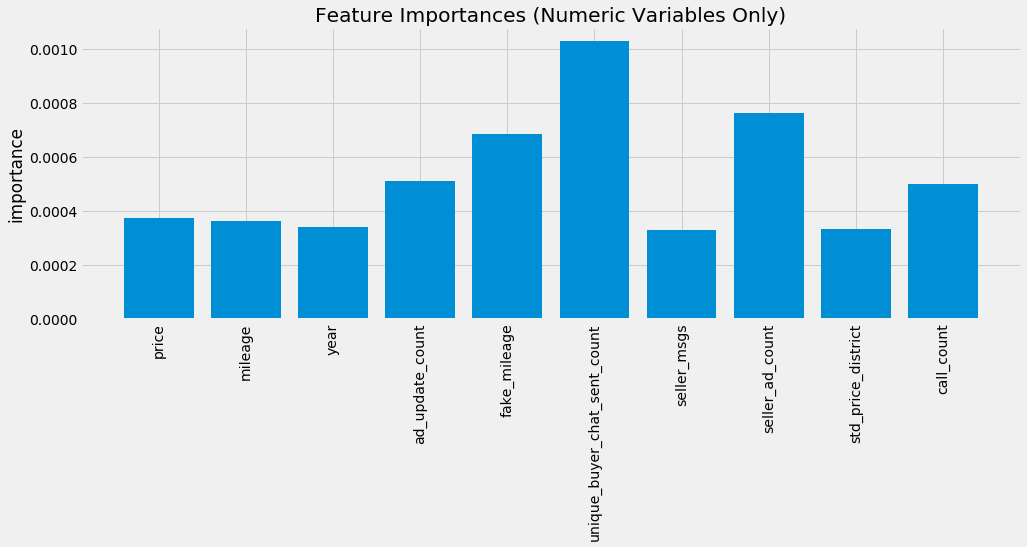

In [131]:
plt.figure(figsize=(15, 5))
plt.bar(numeric_features, xgb_model.feature_importances_[:len(numeric_features)])
plt.title('Feature Importances (Numeric Variables Only)')
plt.ylabel('importance');
_ = plt.xticks(rotation=90)

In [67]:
title_vect = search.best_estimator_.named_steps['features'].named_transformers_['title_bow']
descr_vect = search.best_estimator_.named_steps['features'].named_transformers_['descr_bow']

In [69]:
title_vect.get_feature_names()

['000',
 '000 km',
 '000 km driven',
 '000km',
 '01',
 '01 2010',
 '01 2010 patrol',
 '03',
 '0300',
 '0300 faisal',
 '0300 faisal 2180954',
 '0304',
 '0304 45',
 '0304 45 26',
 '0304_45_26_2_52',
 '0323',
 '0323 73',
 '04',
 '04 reg',
 '04 reg 05',
 '04 reg05',
 '04 reg05 a1',
 '05',
 '05 01',
 '05 01 2010',
 '05 10',
 '05 10 excellent',
 '05 a1',
 '05 a1 condition',
 '06',
 '06 08',
 '07',
 '07 registered',
 '07 registered 15',
 '08',
 '08 14',
 '08 cng',
 '08 cng petrol',
 '08 efi',
 '08 efi engine',
 '09',
 '09 sale',
 '0d',
 '0d 2003',
 '0d sale',
 '0d saloon',
 '0meter',
 '0n',
 '0n easy',
 '0n easy installment',
 '10',
 '10 10',
 '10 10 ac',
 '10 10 condition',
 '10 14',
 '10 14 genuine',
 '10 2007',
 '10 2007 efi',
 '10 ac',
 '10 behtreen',
 '10 behtreen condition',
 '10 condition',
 '10 condtion',
 '10 excellent',
 '10 excellent condition',
 '10 good',
 '10 good condition',
 '10 good original',
 '10 markup',
 '10 markup rate',
 '10 model',
 '10 original',
 '10 original company

In [6]:
ads_data.head()

,listing_id,status,district_id,city_id,seller_id,created_at_first,created_at,valid_to,trackevent,title,description,price,brand,model,fuel_type,mileage,installments,new_or_used,year,registration_city,time_sold_local,ad_update_count
0,1001879044,removed_by_user,5000145,4060695,101422439,2019-01-01 14:36:20,2019-05-01 10:29:54,2019-01-31 14:36:20,ad_remove_complete,Toyota premio 2014 model for sell,Toyota Premio red wine family used car with fu...,3200000,toyota,toyota-57,petrol,95000,cash,used,2014,karachi,NaN,2
1,1001903073,sold,5001000,4060615,103680578,2019-01-02 11:25:23,2019-07-16 14:08:07,2019-02-01 11:25:23,ad_mark_sold_confirm,daewoo racer family car,daewoo racer on my name red passport book comp...,210000,daewoo,daewoo-3,cng,9999,cash,used,1993,lahore,2019-07-16 14:08:07,2
2,1001915462,removed_by_user,1,4060660,103915700,2019-01-02 17:08:15,2019-07-16 09:38:44,2019-02-01 17:08:15,ad_remove_complete,Suzuki Bolan for sale,Bumper to Bumper 100% Genuine\nNa kahin zang n...,750000,NaN,NaN,NaN,54571,NaN,used,2014,NaN,NaN,3
3,1001932935,sold,5000181,4060695,23520885,2019-01-03 10:26:03,2019-06-30 07:55:03,2019-02-02 10:26:03,ad_mark_sold_confirm,Alto taxi 660,Jesi hai jahan hai ki bonyad par urgent sell \...,70000,suzuki,cars-suzuki-1,cng,1,cash,used,1993,karachi,2019-06-30 07:55:03,2
4,1002157412,removed_by_user,1,4060675,29031033,2019-01-10 14:19:00,2019-05-21 10:22:03,2019-02-09 14:19:00,ad_remove_complete,Suzuki Baleno JXR 2005,"Suzuki Baleno 2005\nNeat & Clean Interior, Ext...",500000,suzuki,cars-suzuki-4,petrol,150000,cash,used,2005,lahore,NaN,3


In [42]:
all_items = ads_data.groupby('model')['listing_id'].apply(list).reset_index()

In [43]:
all_items = all_items.set_index('model')['listing_id'].apply(pd.Series).unstack().reset_index(level=-1)
all_items.columns = ['model','items']

In [58]:
all_items = all_items[all_items['items'].notna()]

In [59]:
all_items.head(100)

,model,items
0,audi-1,1006926611
0,audi-11,1005678941
0,audi-12,1005877974
0,audi-13,1005985835
0,audi-2,1005534876
0,audi-3,1006653195
0,audi-4,1005688217
0,audi-5,1006670786
0,audi-6,1005172931
0,audi-7,1006702739


In [64]:
audi_data = all_items[all_items['model'].str.startswith('bmw')]
suzuki_data = all_items[all_items['model'].str.startswith('cars-suzuki')]

In [66]:
suzuki_data.head()

,model,items
0,cars-suzuki-1,1001932935
0,cars-suzuki-10,1006897443
0,cars-suzuki-11,1005472129
0,cars-suzuki-12,1004201807
0,cars-suzuki-14,1004709633


In [81]:
suzuki_data['key'] = 0

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
audi_data['key'] = 0

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
audi_pairs = audi_data.merge(audi_data, how='outer', on='key')

In [73]:
audi_pairs = audi_pairs.query('model_x != model_y')

In [75]:
audi_pairs = audi_pairs.drop(['model_x','model_y','key'], axis=1)

In [77]:
audi_pairs['label'] = 1

In [142]:
suzuki_pairs = (audi_data
.merge(suzuki_data, how='outer', on='key').query('model_x != model_y')
.drop(['model_x','model_y','key'], axis=1))

In [143]:
suzuki_pairs['label'] = 0

suzuki_pairs =  suzuki_pairs.sample(frac=0.1).reset_index(drop=True)

In [144]:
suzuki_pairs['items_x'] = suzuki_pairs['items_x'].astype(int)

In [145]:
audi_pairs['items_x'] = audi_pairs['items_x'].astype(int)

In [ ]:
audi_pairs = audi_pairs[["items_x","items_y"]]
audi_pairs.columns = ["item", "positive"]

suzuki_pairs = suzuki_pairs[["items_x","items_y"]]
suzuki_pairs.columns = ["item", "negative"]


In [153]:

all_pairs = audi_pairs.merge(suzuki_pairs, on="item", how="left").sample(frac=1.0).drop_duplicates(["item", "positive"])

In [156]:
all_pairs.reset_index(drop=True, inplace=True)

In [157]:
all_pairs.head()

,item,positive,negative
0,1005861129,1006993912,1006976820
1,1006357099,1005753721,1005801205
2,1005925060,1005701719,1006979925
3,1005798477,1005794984,1006653290
4,1006993841,1005762021,1005304161


In [158]:
items = set(all_pairs['item'].tolist() + all_pairs['positive'].tolist() + all_pairs['negative'].tolist())

In [165]:
item_attr = ads_data[ads_data['listing_id'].isin(items)].reset_index(drop=True)
item_attr = item_attr[['listing_id','title','district_id']]

In [222]:
item_attr.head()

,listing_id,title,district_id,item_id,location_id
0,1001932935,Alto taxi 660,5000181,2,60
1,1004204083,Good condition Suzuki mehran 97 modl,1,23,0
2,1004971832,Apv in excellent condition just like new,1,63,0
3,1005466482,Suzuki Mehran vxr,5000914,120,142
4,1006019452,Suzuki Mehran VX 2014,5000262,371,78


In [225]:
all_pairs.head()

,item,positive,negative,item_id,positive_id,negative_id,pos_score,neg_score
0,1005861129,1006993912,1006976820,293,750,743,0.125465,-0.001755
1,1006357099,1005753721,1005801205,505,248,275,0.296697,-0.060976
2,1005925060,1005701719,1006979925,325,222,746,0.046402,-0.081146
3,1005798477,1005794984,1006653290,272,271,623,0.137837,-0.048180
4,1006993841,1005762021,1005304161,749,253,92,0.078952,-0.015470


In [257]:
path = "s3://olx-relevance-panamera-west/reco-network/"

names = [
    'listing_id',
    'district_id',
    'city_id',
    'created_at_first',
    'title',
    'description',
    'price',
    'brand',
    'model',
    'fuel_type',
    'mileage',
    'installments',
    'new_or_used',
    'year',
    'registration_city',
]

positive_pairs = pd.read_csv(path+'item_info/000.gz', 
                            names=names, 
                             escapechar='\\', 
                             index_col=False)

In [258]:
positive_pairs.head()

,listing_id,district_id,city_id,created_at_first,title,description,price,brand,model,fuel_type,mileage,installments,new_or_used,year,registration_city
0,849200978,NaN,4060640,2017-09-12 17:19:52,KIA Classic 2001,Price Can Be Negotiable ..\n\nKIA Classic 2001...,300000,kia,kia-1,cng,1.0,NaN,used,2001.0,mardan
1,863469073,5000025.0,4060673,2018-10-10 13:29:26,KIA used cars for sale 2015 get on installment.,Used KIA cars for sale 2015 get on easy instal...,100000,NaN,NaN,petrol,170.0,lease,used,2015.0,lahore
2,863594286,5001525.0,4060695,2018-10-13 05:01:12,Toyota starlet Publica 1974,Tax paid 2017 \n\nComplete documents available...,350000,toyota,toyota-70,cng,26000.0,NaN,used,1974.0,karachi
3,1000238210,1.0,4060660,2018-11-06 17:49:40,Car sale,Owner like a new modal,1060000,toyota,toyota-23,petrol,147000.0,cash,used,2008.0,lahore
4,1000516073,1.0,4060643,2018-11-15 16:32:35,Toyota Vitz 09/12 Lahore,Toyota Vitz\nModel 2009\nRegister 2012\nColour...,1020000,toyota,toyota-82,petrol,76000.0,cash,used,2009.0,lahore


In [249]:
from keras.layers import Input, Dense, Embedding, Flatten, concatenate, Dot, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder

item_encoder = LabelEncoder()
item_encoder.fit(list(items))

item_attr["location_id"] = LabelEncoder().fit_transform(list(item_attr["district_id"]))
item_attr["item_id"] = LabelEncoder().fit_transform(list(item_attr["listing_id"]))
all_pairs["item_id"] = item_encoder.transform(all_pairs["item"])
all_pairs["positive_id"] = item_encoder.transform(all_pairs["positive"])
all_pairs["negative_id"] = item_encoder.transform(all_pairs["negative"])

title_max_len = 5
num_location_id = 1000

title_tokenizer = Tokenizer(num_words=10000)
title_tokenizer.fit_on_texts(item_attr["title"])
title_vocab_size = len(title_tokenizer.word_index) + 1

items_titles_encoded = title_tokenizer.texts_to_sequences(item_attr["title"])
items_titles_encoded = pad_sequences(items_titles_encoded, padding='post', maxlen=title_max_len)

location_encoded = item_attr[["location_id"]].values

title_input = Input(shape=(title_max_len,))
title_embedding = Embedding(title_vocab_size, 64)(title_input)
title_lstm = LSTM(32)(title_embedding)

location_id_input = Input(shape=(1,))
location_embedding = Embedding(num_location_id, 64)(location_id_input)
location_flattened = Flatten()(location_embedding)

merged = concatenate([title_lstm, location_flattened])
merged = Dropout(0.3)(merged)

z = Dense(512, activation="relu")(merged)
z = Dense(64, activation="tanh")(z)

sub_model = Model(inputs=[title_input, location_id_input], outputs=[z])

item_title_enc = Input(shape=(title_max_len,))
location_id_enc = Input(shape=(1,))

pos_item_title_enc = Input(shape=(title_max_len,))
pos_location_id_enc = Input(shape=(1,))

neg_item_title_enc = Input(shape=(title_max_len,))
neg_location_id_enc = Input(shape=(1,))

item_embedding = sub_model([item_title_enc, location_id_enc])
positive_item_embedding = sub_model([pos_item_title_enc, pos_location_id_enc])
negative_item_embedding = sub_model([neg_item_title_enc, neg_location_id_enc])

positive_sim = Dot(axes=-1)([item_embedding, positive_item_embedding])
negative_sim = Dot(axes=-1)([item_embedding, negative_item_embedding])

output = concatenate([positive_sim, negative_sim])

model = Model(inputs = [item_title_enc, location_id_enc,
                        pos_item_title_enc, pos_location_id_enc,
                        neg_item_title_enc, neg_location_id_enc],
              outputs = output)


model.compile(loss="categorical_crossentropy", optimizer="adam")

y_train =  len(all_pairs)*[[1,0]]

model.fit([items_titles_encoded[all_pairs["item_id"]], location_encoded[all_pairs["item_id"]],
           items_titles_encoded[all_pairs["positive_id"]], location_encoded[all_pairs["positive_id"]],
           items_titles_encoded[all_pairs["negative_id"]], location_encoded[all_pairs["negative_id"]]
          ], np.array(y_train), epochs=8)

item_embdedding = sub_model.predict([items_titles_encoded, location_encoded])

all_pairs.head()

np.dot(item_embdedding[293], item_embdedding[750])

np.dot(item_embdedding[293], item_embdedding[743])

all_pairs["pos_score"] = all_pairs.apply(lambda row: np.dot(item_embdedding[row["item_id"]],
                                                            item_embdedding[row["positive_id"]]) , axis=1)
all_pairs["neg_score"] = all_pairs.apply(lambda row: np.dot(item_embdedding[row["item_id"]],
                                                            item_embdedding[row["negative_id"]]) , axis=1)

all_pairs[["pos_score", "neg_score"]].describe()

In [256]:
item_embdedding.dtype

dtype('float32')

In [248]:
all_pairs[["pos_score", "neg_score"]].describe()

,pos_score,neg_score
count,882.000000,882.000000
mean,0.007363,0.048743
std,0.008204,0.032726
min,-0.010546,0.001639
25%,0.002037,0.023572
50%,0.005677,0.040947
75%,0.010788,0.065922
max,0.057400,0.228872


In [233]:
all_pairs.head(10)

,item,positive,negative,item_id,positive_id,negative_id,pos_score,neg_score
0,1005861129,1006993912,1006976820,293,750,743,0.125465,-0.001755
1,1006357099,1005753721,1005801205,505,248,275,0.296697,-0.060976
2,1005925060,1005701719,1006979925,325,222,746,0.046402,-0.081146
3,1005798477,1005794984,1006653290,272,271,623,0.137837,-0.048180
4,1006993841,1005762021,1005304161,749,253,92,0.078952,-0.015470
5,1005798477,1006165994,1006621379,272,429,611,0.099079,-0.053460
6,1005418958,1006489813,1005146167,112,562,75,0.173991,-0.050857
7,1001881660,1001881190,1007092822,1,0,793,0.035037,-0.048344
8,1005753721,1005794984,1006820980,248,271,694,0.271456,-0.133473
9,1006505312,1006993912,1006432525,568,750,536,0.191549,-0.051502


In [251]:
all_pairs.to_csv('all_pairs.csv', index=False)

In [252]:
item_attr.to_csv('item_attr.csv', index=False)